### Choosing pickle files
- Using tensorboard determine the (1) test domain (2) best set of hparams
### PACS Dataset Information
- 66 $\rightarrow C_N=\{1,6\}, C_O=\{0,2,3,4,5\}$
- 33 $\rightarrow C_N=\{0,1,3,5,6\}, C_O=\{2,4\}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import os
import numpy as np
from glob import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
dir(mcolors)
#mcolors.LightSour.keys()
dir(plt.get_cmap('hot'))
dir(cm)

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'ColormapRegistry',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'Mapping',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'ScalarMappable',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 '_LUTSIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package_

In [2]:
def get_tsne_df(path, pca_components=48):

    df = pd.read_pickle(path)

    pca = PCA(n_components=pca_components)
    zs = np.array(list(df['latent_vector']))
    pca.fit(zs)
    print('Cumulative explained variation for {} principal components: {}'.format(
        pca_components, np.sum(pca.explained_variance_ratio_)))

    # use tsne
    zs = pca.transform(zs)
    tsne = TSNE(n_components=2, perplexity=40)
    df['tsne_embeddings'] = list(tsne.fit_transform(zs))

    return df


def plot_embeddings(data, ax, point_type, alpha=1, s=1):
    markers = ['o', 'v', 'p', '*', 'D', '>', 'P']
    if point_type.lower() == "class":
        colors = list(mcolors.TABLEAU_COLORS.keys())
    else:
        colors = cm.Blues(np.linspace(0,1, len(data[point_type].unique())+1))
    for i, label in enumerate(data[point_type].unique()):
        ax.scatter(
            x=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 0].tolist(), 
            y=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 1].tolist(), 
            s=mpl.rcParams['lines.markersize'] ** s,
            color = colors[i+1], 
            label=label,
            marker='o',
            alpha=alpha
            #edgecolor='black'
            )
    ax.legend(
        title=point_type, 
        markerscale=2, 
        loc='center right', 
        bbox_to_anchor=(1.15,0.5),
        frameon=False
    )
    ax.axis('off')
    
    return ax

# XDomError Results
- For ERM: /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9/tsne_data.pickle test_env: 3 
- For This: /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/54c54b901faa47fad7da7c8af58976f9/tsne_data.pickle test_env: 3
- Best performing model for PACS 66 for both algorithms
- (1) Focus on same class different domain clustering and (2) non-overlapping domain performance

In [3]:
folders = [  
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/841a8f3b78c38ed7b5f1de3b3493cb30',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/0f8527d638246c520eab004565406714',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bd18dc8955faabbde9d97bde425d5b33',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/701a1c61015009d20034209bc03e40a8',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/54c54b901faa47fad7da7c8af58976f9',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/827f64403ffdfda52232bda06c48c922',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/58db656b82cf9862628a9b2e967551d7',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d13b8c53ba3f5130e31bcd17c3079690',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/78f280b423731760cc65c48ed86bf45e',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/1cec247d6d13402df03cf731baff1098',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6ba7ec9b4cd2cb5a22f17bca7159796d',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/44381f8b135e661544c0624058aea244',
'XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8962630380fcd99c157a074c4aad7d86',
]
files = []
for folder in folders:
    path = f'/Users/kimathikaai/scratch/saved/domainbed_results/*/{folder}/*.pickle'
    path = sorted(glob(path, recursive=True))[0]
    assert os.path.exists(path), path
    files.append(path)
files

['/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS

In [4]:
df_list = []
for file in files:
    print('[processing]: ', file)
    df_list.append((get_tsne_df(file), file))
df_list[0][0]

[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.950805127620697


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9687433242797852


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9737131595611572


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9796015620231628


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9877921342849731


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9757814407348633


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/841a8f3b78c38ed7b5f1de3b3493cb30/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9778367280960083


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/0f8527d638246c520eab004565406714/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9427076578140259


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bd18dc8955faabbde9d97bde425d5b33/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9728787541389465


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9720679521560669


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/701a1c61015009d20034209bc03e40a8/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9667762517929077


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/54c54b901faa47fad7da7c8af58976f9/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9746094942092896


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/827f64403ffdfda52232bda06c48c922/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9989737272262573


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.968745231628418


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/58db656b82cf9862628a9b2e967551d7/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.998409628868103


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9796034097671509


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9877942800521851


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d13b8c53ba3f5130e31bcd17c3079690/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9350242614746094


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/78f280b423731760cc65c48ed86bf45e/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9989144802093506


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/1cec247d6d13402df03cf731baff1098/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9826117157936096


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6ba7ec9b4cd2cb5a22f17bca7159796d/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9988247156143188


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/3551c9f994c1f424747d5168d8311c47/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9720679521560669


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/44381f8b135e661544c0624058aea244/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9981859922409058


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8962630380fcd99c157a074c4aad7d86/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9989412426948547


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,latent_vector,prediction,class,domain,is_test,tsne_embeddings
0,"[4.5362167, 0.0, 4.1773357, 4.470632, 0.187032...",-0.826630,6,0,0,"[-12.905346, 52.330593]"
1,"[4.833381, 1.4357321, 3.4035485, 0.27930984, 0...",-2.709073,5,0,0,"[23.820147, 45.288082]"
2,"[1.8522497, 0.042130023, 2.2020497, 1.5951886,...",-0.599694,6,0,0,"[-7.609407, 47.602776]"
3,"[10.619737, 3.752179, 6.788472, 0.06040553, 20...",35.346828,0,0,0,"[71.65315, 6.707903]"
4,"[12.229649, 5.5981793, 5.2964725, 0.09334069, ...",35.037270,0,0,0,"[71.72298, 6.3151197]"
...,...,...,...,...,...,...
780,"[0.087656006, 0.8917197, 0.3484073, 1.8893298,...",-6.047466,3,3,1,"[-46.791225, 26.148472]"
781,"[0.97708756, 1.6098965, 0.17996885, 1.7666247,...",-3.012813,2,3,1,"[16.396484, -30.95027]"
782,"[0.15583663, 0.45242518, 0.19775648, 0.9988909...",-2.640691,1,3,1,"[-9.262819, 5.1406026]"
783,"[0.28350803, 0.80313045, 0.43606746, 2.0752833...",-1.364759,1,3,1,"[2.044852, 18.191391]"


/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/50897f337eecb4dcd175fb8e997007d9/tsne_data.pickle
test_env: 3
/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/41e92b26df0b1dc3894b52d27d01d970/tsne_data.pickle
test_env: 1
/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/cb8267475230392cff913309cca60259/tsne_data.pickle
test_env: 0
/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/94c2271242096367919f8b4d291672f6/tsne_data.pickle
test_env: 0
/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/9620886701e89ef46150d3a581c99239/tsne_data.pickle
test_env: 3
/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5eaed5ac9234303b836ce8415d35616c/tsne_data.pickle
test_env: 1
/Users/kimathikaai/scr

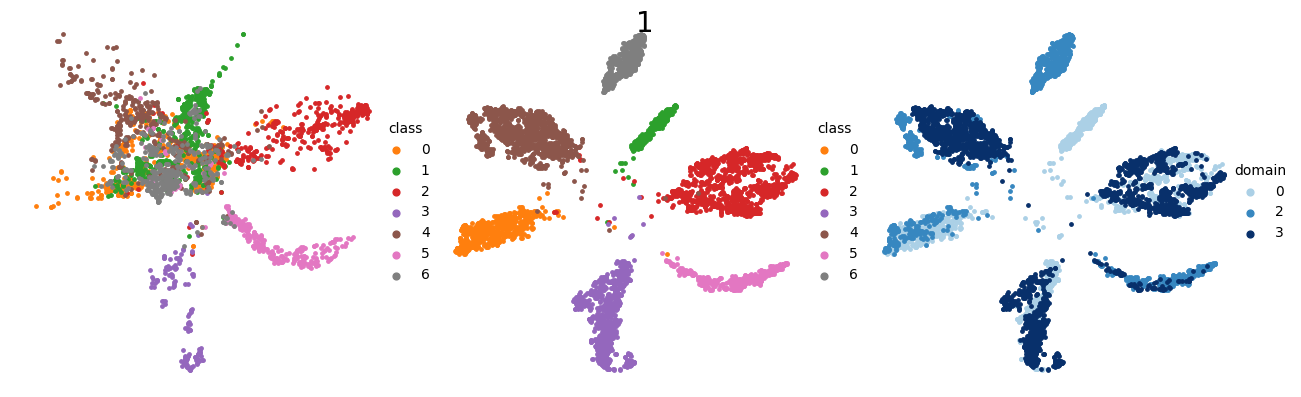

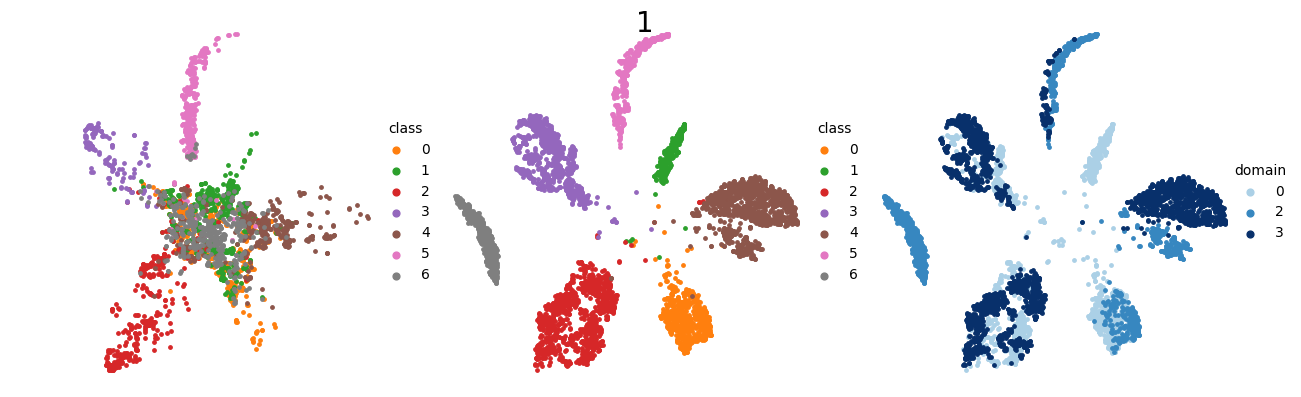

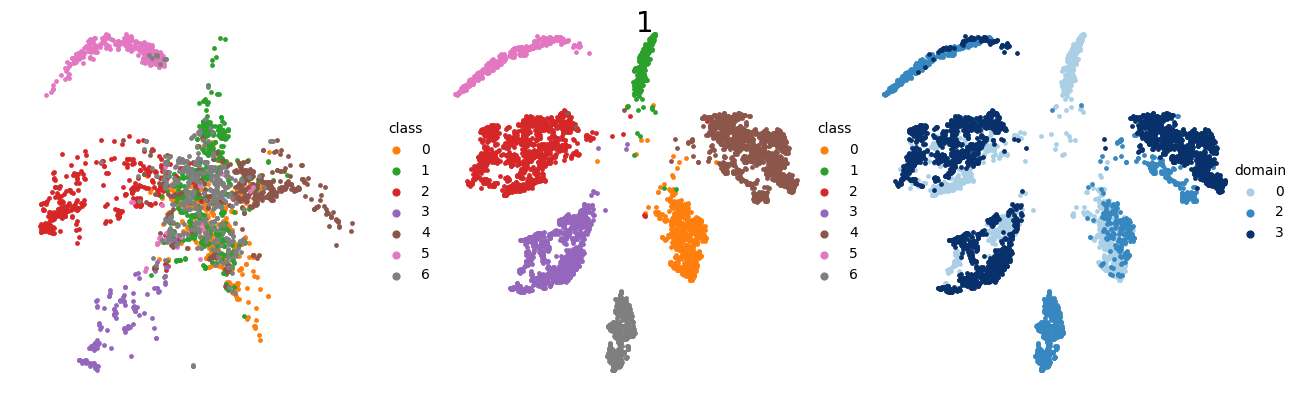

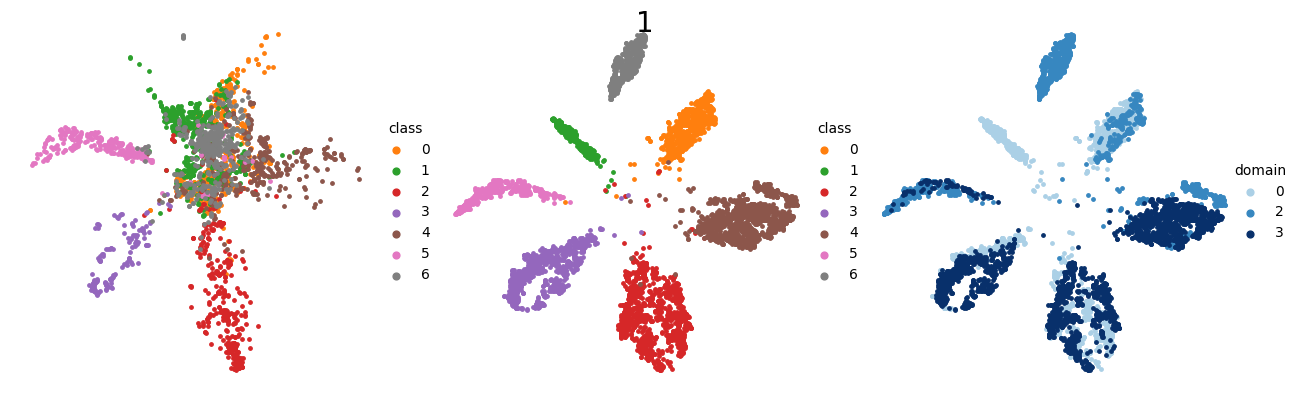

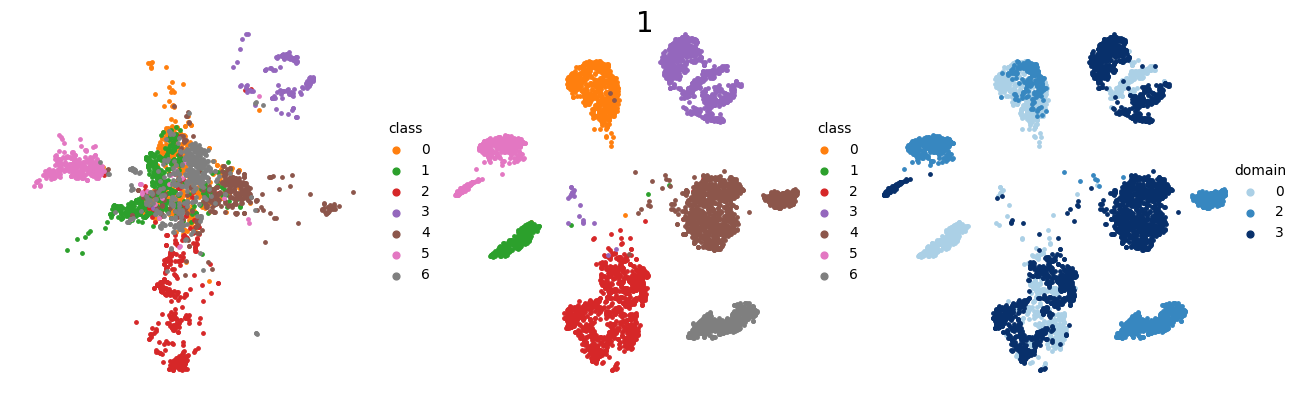

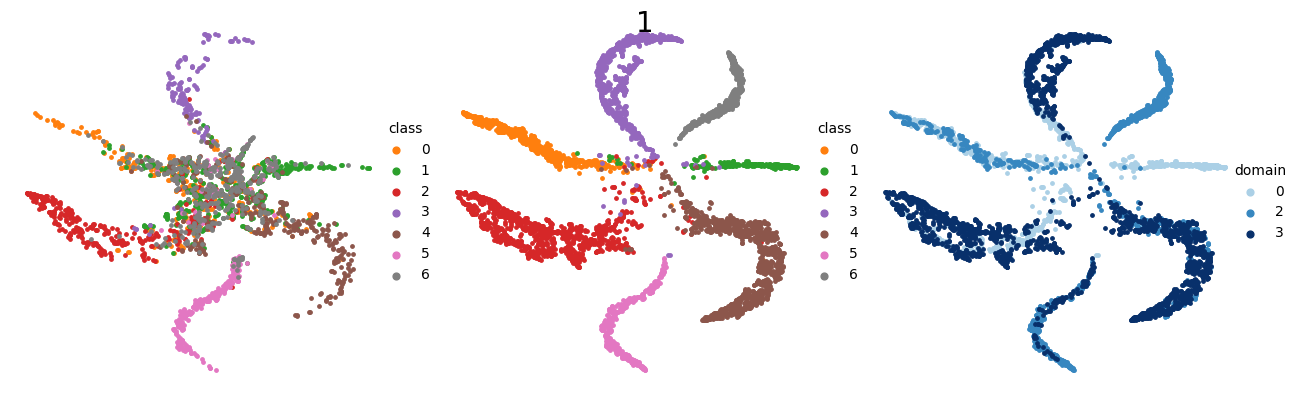

In [5]:
for df, file in df_list:
    print(file)
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    if test_env != 1: continue

    fig, ax = plt.subplots(ncols=3, figsize=(13,4), sharex=True)
    # plot all target classes
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    ax[0] = plot_embeddings(data=data, ax=ax[0], point_type=point_type)

    # plot all source classes
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[1] = plot_embeddings(data=data, ax=ax[1], point_type=point_type)

    # plot all source domains
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[2] = plot_embeddings(data=data, ax=ax[2], point_type=point_type)

    fig.tight_layout()
    fig.suptitle(f"{test_env}", fontsize=20)

# ERM Baseline

In [6]:
folders = [
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f86b3cc468dd62cc3baaac4834879428',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b00e7c2a9b675375ede2572b7c0db128',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/28168eb78961558ccbc2ad6e47443084',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f5c19ac335e862a5ea8c772a6a9e347c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/871555760dcd62458679698b7df05833',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d4d1e62236c8667d0fd27ee2126f6384',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bb446f4a54c16bcb674108582508932c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6e49668d5b26e5cf4697b3a3005b1428',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/852f0896d109b4404cf5785f18d50b3c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/146027d012c1e0b0322b2ae3fe672b74',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d276cb54cdb52181348333a0a92c27f6',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/07359767d3beb0751d048ebef8742cea',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b944c0f799ccbad794fb20674c7ed088',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f37a062167e38bf3fc58fb1c98eee139',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0b01fd0d32e965050d616cd637b2965',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/7bb3fbbd8178fb5978fd5f7d08367066',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18',
'ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9',
]
files = []
for folder in folders:
    path = f'/Users/kimathikaai/scratch/saved/domainbed_results/*/{folder}/*.pickle'
    path = sorted(glob(path, recursive=True))[0]
    assert os.path.exists(path), path
    files.append(path)
files

['/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f86b3cc468dd62cc3baaac4834879428/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b00e7c2a9b675375ede2572b7c0db128/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/28168eb78961558ccbc2ad6e47443084/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f5c19ac335e862a5ea8c772a6a9e347c/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/871555760dcd62458679698b7df05833/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad/tsne_data.pickle',
 '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d4d1e6223

In [7]:
erm_df_list = []
for file in files:
    print('[processing]: ', file)
    erm_df_list.append((get_tsne_df(file), file))
erm_df_list[0][0]

[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f86b3cc468dd62cc3baaac4834879428/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9195859432220459


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b00e7c2a9b675375ede2572b7c0db128/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9556755423545837


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/28168eb78961558ccbc2ad6e47443084/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9145654439926147


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f5c19ac335e862a5ea8c772a6a9e347c/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9338572025299072


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/871555760dcd62458679698b7df05833/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9351887702941895


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9145402312278748


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d4d1e62236c8667d0fd27ee2126f6384/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9490762948989868


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bb446f4a54c16bcb674108582508932c/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9183566570281982


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/6e49668d5b26e5cf4697b3a3005b1428/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9547041654586792


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/852f0896d109b4404cf5785f18d50b3c/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9282181262969971


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9232219457626343


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9306080341339111


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/146027d012c1e0b0322b2ae3fe672b74/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9982835054397583


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/d276cb54cdb52181348333a0a92c27f6/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9071366786956787


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/07359767d3beb0751d048ebef8742cea/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9549100995063782


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b4a403603cfae2b79c14a8a578e68c96/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.936341404914856


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b944c0f799ccbad794fb20674c7ed088/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9962279796600342


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.914546012878418


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f37a062167e38bf3fc58fb1c98eee139/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9666529297828674


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8d1cf09570355de7fd1c84226b3b094c/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9610615968704224


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0b01fd0d32e965050d616cd637b2965/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9029592275619507


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/7bb3fbbd8178fb5978fd5f7d08367066/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9380816221237183


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/e0e0f3dd065da05688c758b826692a18/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9232375621795654


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[processing]:  /Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/5b6c62f756e21a7af8c6863b3755d7e9/tsne_data.pickle
Cumulative explained variation for 48 principal components: 0.9306088089942932


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,latent_vector,prediction,class,domain,is_test,tsne_embeddings
0,"[0.37421784, 0.5196064, 0.782909, 0.280724, 7....",-0.373466,0,0,1,"[16.088352, 29.6512]"
1,"[0.35567358, 0.93132424, 3.797098, 0.42631343,...",-3.669599,5,0,1,"[-20.851072, 0.49935633]"
2,"[0.4812343, 0.5398323, 9.307896, 0.87847626, 1...",-0.487534,2,0,1,"[1.0987302, -16.086977]"
3,"[3.618074, 0.9565949, 0.40206864, 0.41405207, ...",-2.852577,1,0,1,"[1.2316209, 18.082525]"
4,"[0.33657318, 0.29408592, 1.3903672, 2.6031065,...",7.391772,0,0,1,"[22.320915, 8.923142]"
...,...,...,...,...,...,...
569,"[3.7757418, 0.60106784, 5.575043, 1.3475672, 6...",-4.502011,2,3,0,"[1.9097837, -28.905827]"
570,"[1.3896668, 0.08184534, 0.02997175, 0.03166879...",17.610680,0,3,0,"[48.708748, -24.404608]"
571,"[7.786925, 0.94833803, 0.13193317, 0.3858718, ...",20.221785,0,3,0,"[47.203007, -13.817584]"
572,"[7.8592653, 0.614509, 0.019641088, 0.5743133, ...",0.388397,3,3,0,"[-55.056534, 19.35349]"


/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f86b3cc468dd62cc3baaac4834879428/tsne_data.pickle
test_env: 0
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/b00e7c2a9b675375ede2572b7c0db128/tsne_data.pickle
test_env: 3
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/28168eb78961558ccbc2ad6e47443084/tsne_data.pickle
test_env: 2
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/f5c19ac335e862a5ea8c772a6a9e347c/tsne_data.pickle
test_env: 1
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/871555760dcd62458679698b7df05833/tsne_data.pickle
test_env: 2
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/8858446df972524627c982b5b3a255ad/tsne_data.pickle
test_env: 1
/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_

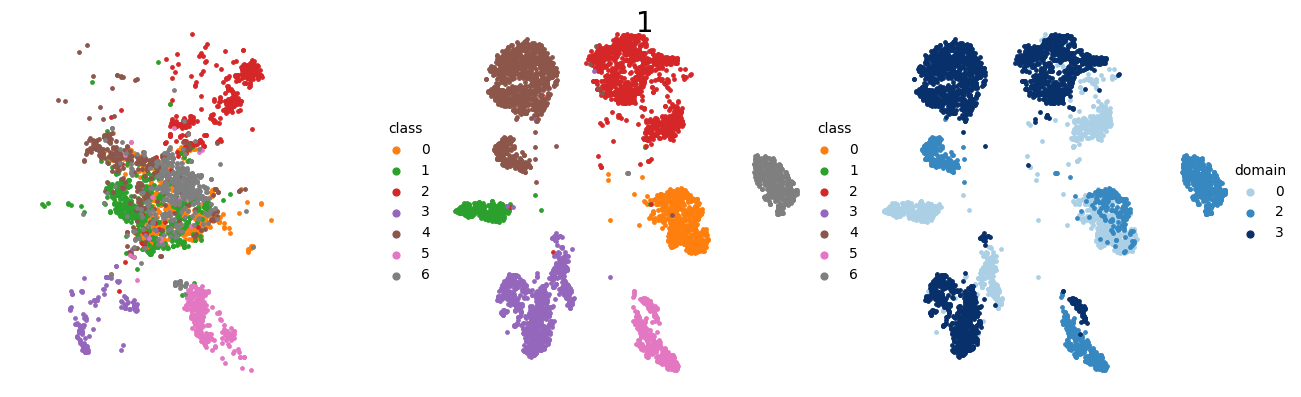

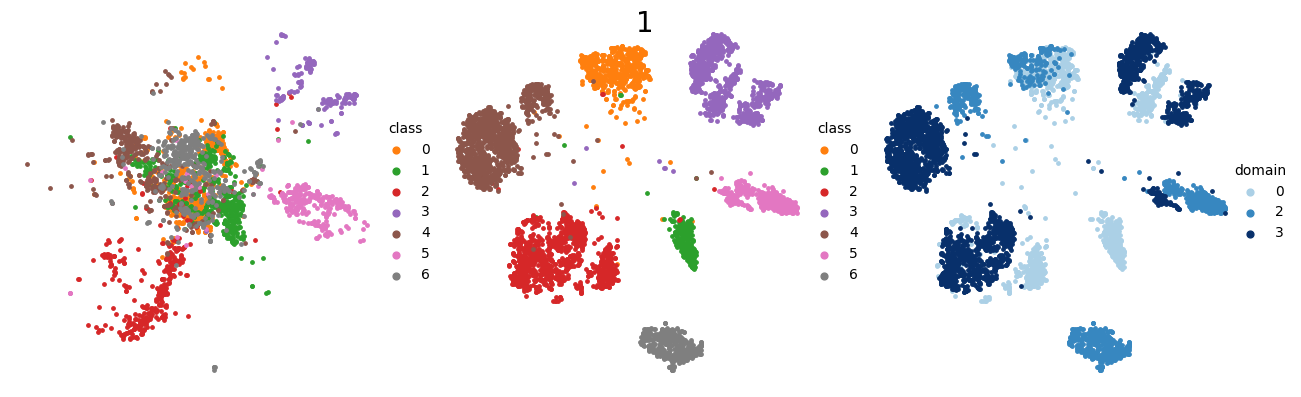

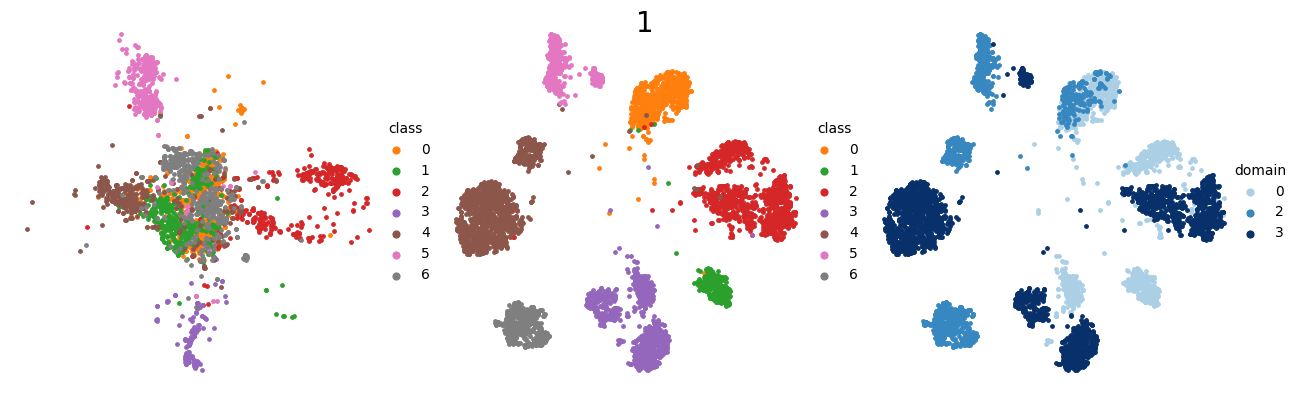

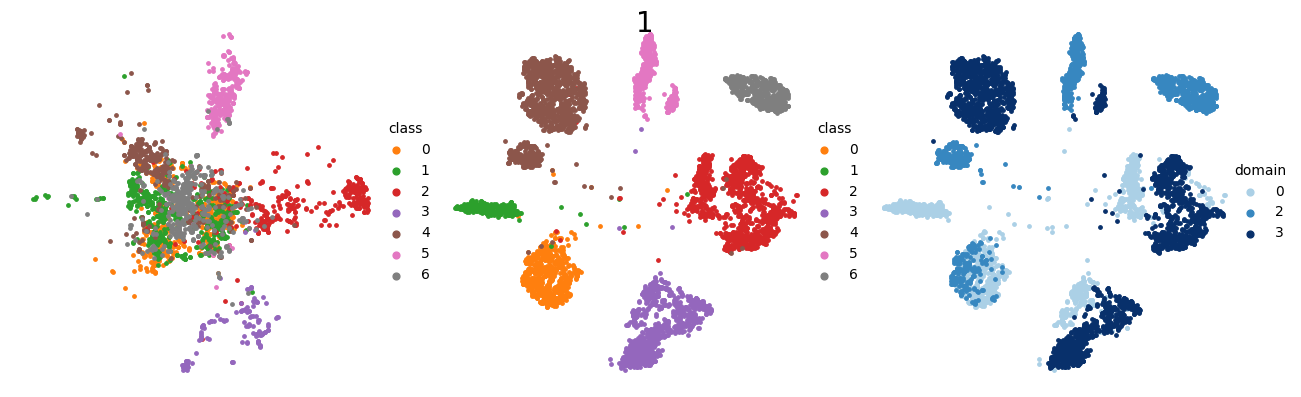

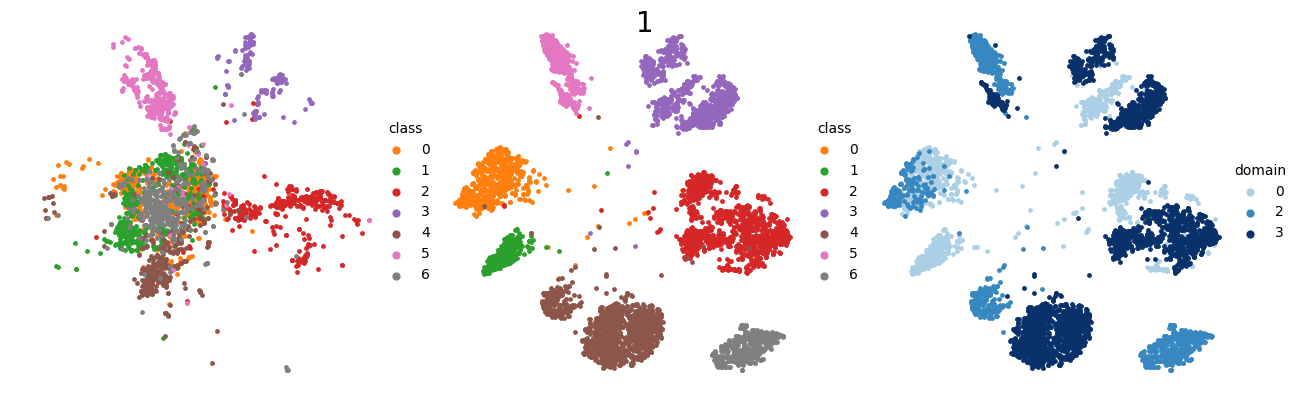

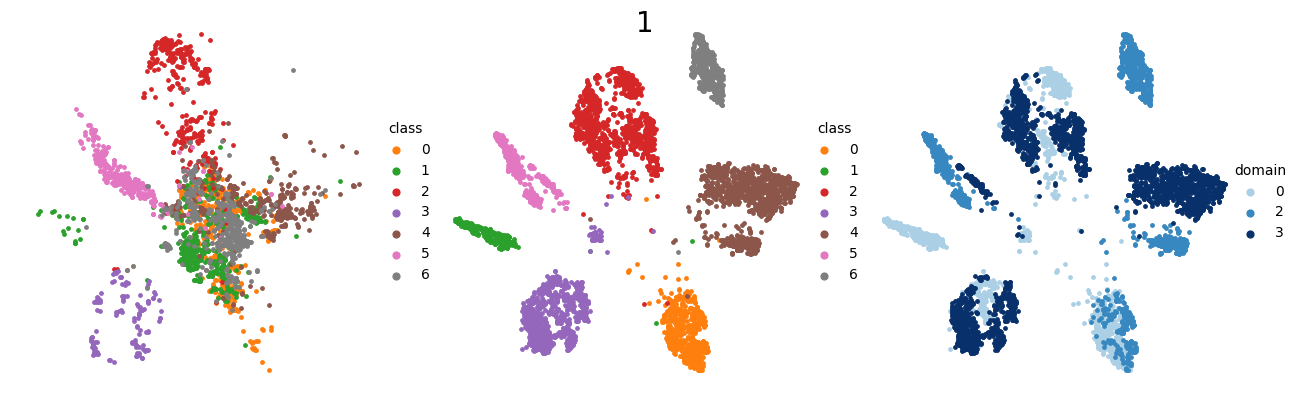

In [8]:
for df, file in erm_df_list:
    print(file)
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    if test_env != 1: continue

    fig, ax = plt.subplots(ncols=3, figsize=(13,4), sharex=True)
    # plot all target classes
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    ax[0] = plot_embeddings(data=data, ax=ax[0], point_type=point_type)

    # plot all source classes
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[1] = plot_embeddings(data=data, ax=ax[1], point_type=point_type)

    # plot all source domains
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[2] = plot_embeddings(data=data, ax=ax[2], point_type=point_type)

    fig.tight_layout()
    fig.suptitle(f"{test_env}", fontsize=20)

# Camera Ready t-SNE Plots

In [9]:
erm_file = '/Users/kimathikaai/scratch/saved/domainbed_results/66/ERM_PACS_o66_h5_s5001_t3_2023-04-11-PACS/bb446f4a54c16bcb674108582508932c/tsne_data.pickle'
erm_df = get_tsne_df(erm_file)
xdomerror_file = '/Users/kimathikaai/scratch/saved/domainbed_results/66/XDomError_PACS_o66_h5_s5001_t3_2023-04-11-PACS/841a8f3b78c38ed7b5f1de3b3493cb30/tsne_data.pickle'
xdomerror_df = get_tsne_df(xdomerror_file)

Cumulative explained variation for 48 principal components: 0.918348491191864


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Cumulative explained variation for 48 principal components: 0.9778343439102173


/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kimathikaai/workspace/envs/xdom/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
# camera ready
def camera_plot_embeddings(data, ax, point_type, alpha=1, s=2):
    markers = ['o', 'v', 'p', '*', 'D', '>', 'P']
    if point_type.lower() == "class":
        colors = list(mcolors.TABLEAU_COLORS.keys())
    else:
        colors = cm.Blues(np.linspace(0,1, len(data[point_type].unique())+1))
    for i, label in enumerate(data[point_type].unique()):
        ax.scatter(
            x=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 0].tolist(), 
            y=np.array(list(data[data[point_type]==label]['tsne_embeddings']))[:, 1].tolist(), 
            s=mpl.rcParams['lines.markersize'] ** s,
            color = colors[i+1], 
            label=label,
            marker='.',
            alpha=alpha
            #edgecolor='black'
            )
    ax.axis('off')
    
    return ax

test_env: 1
test_env: 1


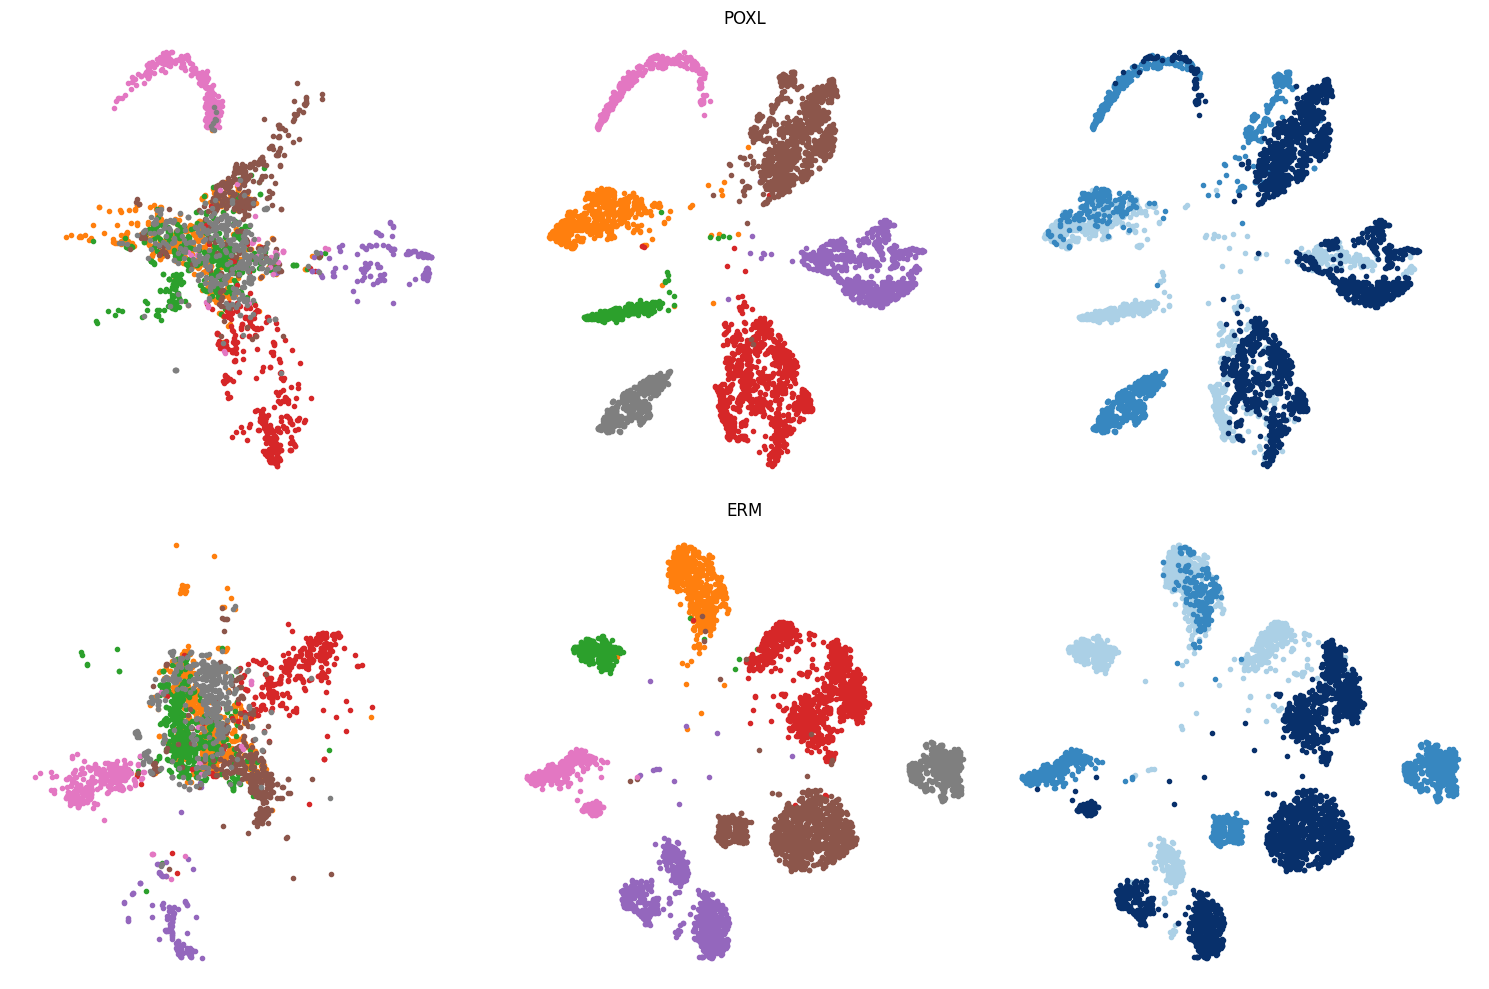

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10), sharex=True)
df_list = [
    (xdomerror_df, "POXL"),
    (erm_df, "ERM")
]
for i, (df,title) in enumerate(df_list):
    # get test_env
    test_env = df[df['is_test'] == 1]['domain'].unique()
    print("test_env:", test_env[0])
    assert len(test_env) == 1
    test_env = test_env[0]
    
    # plot all target classes
    point_type = 'class'
    data = df.loc[(df['is_test']==1)].sort_values(by=point_type)
    ax[i][0] = camera_plot_embeddings(data=data, ax=ax[i][0], point_type=point_type)
#     ax[i][0].legend(
#         title="Classes", 
#         markerscale=8, 
#         loc='center left', 
#         bbox_to_anchor=(1.15,0.5),
#         frameon=False
#     )

    # plot all source classes
    point_type = 'class'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[i][1] = camera_plot_embeddings(data=data, ax=ax[i][1], point_type=point_type)
    ax[i][1].set_title(title)

    # plot all source domains
    point_type = 'domain'
    data = df.loc[(df['is_test']==0)].sort_values(by=point_type)
    ax[i][2] = camera_plot_embeddings(data=data, ax=ax[i][2], point_type=point_type)
#     ax[i][2].legend(
#         title="Training\nDomains", 
#         markerscale=8, 
#         loc='center left', 
#         bbox_to_anchor=(1.15,0.5),
#         frameon=False
#     )


fig.tight_layout()
#fig.suptitle(f"{title}", fontsize=20)